# 1)Module Imports

In [3]:
import pandas as pd             # for data cleaning and data pre-processing, CSV file I/O,etc
import numpy as np              # linear algebra & for mathematical computation
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns           # for visualization
from collections import Counter # to count occurrences
from tabulate import tabulate   # to make tables for results

import warnings                 # for warning removals in code output
warnings.filterwarnings('ignore')

# Scalers & Encoders
from sklearn.preprocessing import StandardScaler, LabelEncoder
#train-test split
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import (mean_squared_error, r2_score,confusion_matrix, classification_report, accuracy_score,roc_auc_score, roc_curve, auc)
# Model Libraries
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import pickle           #to save and load model files as pkl file

## 1.2)Importing the dataset (With error handling)

In [8]:
# 1.2) Importing the dataset (With error handling)
file_path = r"C:\Users\DELL\Capstone Project\CAR DETAILS.csv"  # Use raw string or double backslashes
file_name = file_path.split("\\")[-1]  # Split based on backslashes

try:
    # Reading the Excel file into a Pandas DataFrame
    df = pd.read_csv(file_path)  # Use pd.read_excel() for Excel files
    # Store the filename as an attribute in the DataFrame
    df.file_name = file_name
    print(f"\n'{df.file_name}' loaded successfully.")

# Exception to check if the file has some error like no file at the path, etc.
except FileNotFoundError:
    print(f"Error: '{file_name}' not found at the specified location {file_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



'CAR DETAILS.csv' loaded successfully.


## 1.2) Showing Basic Dataset Information

In [9]:
# Check the shape of the DataFrame
print("\nShape of the DataFrame:")
print(df.shape)
print(df.size)
num_rows, num_columns = df.shape
print(f"Rows: {num_rows}, Columns: {num_columns}")

# Display information about the dataset
print(f"\nDataset information for {df.file_name}:")
df.head(3)
df.tail(3)
print("\nDataset information:")
print(df.info())


Shape of the DataFrame:
(3250, 11)
35750
Rows: 3250, Columns: 11

Dataset information for CAR DETAILS.csv:

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          3250 non-null   object
 1   Model          3250 non-null   object
 2   Variant        3249 non-null   object
 3   Name           3250 non-null   object
 4   Year           3250 non-null   int64 
 5   Km_Driven      3250 non-null   int64 
 6   Fuel           3250 non-null   object
 7   Seller_Type    3250 non-null   object
 8   Transmission   3250 non-null   object
 9   Owner          3250 non-null   object
 10  Selling_Price  3250 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 279.4+ KB
None


### Columns Of Dataset

In [30]:
# Display the columns & rows of dataset
print(f"The columns of our {file_name} dataframe\n")
print(df.columns)

The columns of our CAR DETAILS.xlsx dataframe

Index(['Name', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')


## 1.3) Data Checks to Perform
Check Missing Values.<br>
Check Duplicates<br>
Check Data Type<br>
Check Unique Values<br>
Check Data Statistics<br>
Check Categorical Columns & Data<br><br>
### Missing Values/Null Check

In [31]:
print("Missing values in the dataset:\n")
print(df.isnull().sum())
# NA value calculation
nullval = df.isna().sum()
nullval = nullval[nullval > 0]
print("\nSum of Missing values:\n", nullval)

Missing values in the dataset:

Name             0
Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Sum of Missing values:
 Series([], dtype: int64)


### Duplicate Values Check

In [10]:
print("\nChecking for duplicated values:\n")
print(df.duplicated())
print("\nSum of Duplicated Values in Dataframe :", df.duplicated().sum())


Checking for duplicated values:

0       False
1       False
2       False
3       False
4       False
        ...  
3245    False
3246    False
3247    False
3248    False
3249    False
Length: 3250, dtype: bool

Sum of Duplicated Values in Dataframe : 0


In [11]:
# Dropping Duplicate values from dataframe
df_dup_dropped = df.drop_duplicates().reset_index(drop=True)

print("\nSum of Duplicated Values in Dataframe :",
      df_dup_dropped.duplicated().sum())


Sum of Duplicated Values in Dataframe : 0


In [12]:
# Print the original and new DataFrame shapes, and the number of duplicates removed
print(f"\nOriginal Dataframe Shape: {df.shape}\n"
      f"New Dataframe Shape after Dropping Duplicates: {df_dup_dropped.shape}\n"
      f"No. of duplicate rows removed: {df.shape[0] - df_dup_dropped.shape[0]}")



Original Dataframe Shape: (3250, 11)
New Dataframe Shape after Dropping Duplicates: (3250, 11)
No. of duplicate rows removed: 0


In [13]:
  # Calculating the number of missing values or null values in df
total_missing_values = df_dup_dropped.isnull().sum().sum()
print("The number of missing values/NA in dataframe :", total_missing_values)

# Calculate the total number of values in df (excluding the missing values)
total_values = df_dup_dropped.size
print("Total number of values in dataframe :", total_values)

# percentage of missing values or null values in df
percentage_missing_values = (total_missing_values / total_values) * 100
print("Percentage of missing values or null values in df :",
      percentage_missing_values)

The number of missing values/NA in dataframe : 1
Total number of values in dataframe : 35750
Percentage of missing values or null values in df : 0.002797202797202797


### Check Value Counts

In [14]:
print("Value counts of the dataset by datatypes")
df_dup_dropped.dtypes.value_counts()

Value counts of the dataset by datatypes


object    8
int64     3
Name: count, dtype: int64

### Unique Values Check

In [15]:
print("Unique Value counts inside each columns")
df_dup_dropped.nunique()

Unique Value counts inside each columns


Brand              22
Model             617
Variant           736
Name             1342
Year               20
Km_Driven         678
Fuel                5
Seller_Type         3
Transmission        2
Owner               5
Selling_Price     357
dtype: int64

### Datatype Check

In [16]:
# Check data types of each column
print("Data types of each column:")
df_dup_dropped.dtypes

Data types of each column:


Brand            object
Model            object
Variant          object
Name             object
Year              int64
Km_Driven         int64
Fuel             object
Seller_Type      object
Transmission     object
Owner            object
Selling_Price     int64
dtype: object

### Statistics Summary

In [17]:
print("\nSummary statistics:\n")
print(df_dup_dropped.describe())


Summary statistics:

              Year      Km_Driven  Selling_Price
count  3250.000000    3250.000000   3.250000e+03
mean   2013.028000   65398.458769   3.921096e+05
std       3.994242   36618.790879   2.469511e+05
min    2001.000000       1.000000   2.000000e+04
25%    2010.000000   38000.000000   2.000000e+05
50%    2013.000000   60000.000000   3.400000e+05
75%    2016.000000   90000.000000   5.500000e+05
max    2020.000000  170000.000000   1.195000e+06


### Categorical Column Check

In [18]:
df + df_dup_dropped.select_dtypes(include="category")
categorical_columns = df_dup_dropped.select_dtypes(include=["object"]).columns
print("\nCategorical columns:")
print(categorical_columns)


Categorical columns:
Index(['Brand', 'Model', 'Variant', 'Name', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')


### Checking Descriptive Statistics

In [19]:
print(f"The descriptive Stats for the {file_name} dataset:")
df_dup_dropped.describe()

The descriptive Stats for the CAR DETAILS.csv dataset:


,Year,Km_Driven,Selling_Price
count,3250.000000,3250.000000,3.250000e+03
mean,2013.028000,65398.458769,3.921096e+05
std,3.994242,36618.790879,2.469511e+05
min,2001.000000,1.000000,2.000000e+04
25%,2010.000000,38000.000000,2.000000e+05
50%,2013.000000,60000.000000,3.400000e+05
75%,2016.000000,90000.000000,5.500000e+05
max,2020.000000,170000.000000,1.195000e+06


In [20]:
print("Complete Stats of every column")
print(df_dup_dropped.describe())

Complete Stats of every column
              Year      Km_Driven  Selling_Price
count  3250.000000    3250.000000   3.250000e+03
mean   2013.028000   65398.458769   3.921096e+05
std       3.994242   36618.790879   2.469511e+05
min    2001.000000       1.000000   2.000000e+04
25%    2010.000000   38000.000000   2.000000e+05
50%    2013.000000   60000.000000   3.400000e+05
75%    2016.000000   90000.000000   5.500000e+05
max    2020.000000  170000.000000   1.195000e+06


## 2)Data-Pre-Processing <br>
Extracting Car Manufacturer, Model & Variant Name from Car Name (To do more In-depth analysis)

In [21]:
# Unique values in 'Name' column
print(f"Unique Values in 'Name' column: {df_dup_dropped['Name'].nunique()}")


Unique Values in 'Name' column: 1342


In [22]:
# Functions to extract the respective column name from car name to reduce the complexity of unique values. (Basic Function - does not does teh correct splitting)
def get_brand(name):
    return name.split()[0]


def get_model(name):
    return " ".join(name.split()[1:-1])


def get_variant(name):
    return name.split()[-1]

In [23]:
# creating new copy
df_name_split = df_dup_dropped.copy()
# Calling the SPlitting function
df_name_split["brand"] = df_name_split["Name"].apply(get_brand)
df_name_split["model"] = df_name_split["Name"].apply(get_model)
df_name_split["variant"] = df_name_split["Name"].apply(get_variant)

In [24]:
# Creating a copy to perform the splitting
df_name_split = df_dup_dropped.copy()

# name of the column to be split
car_names = df_dup_dropped["Name"]

# Functions to split car names into brand,model & variant


def split_car_name(Name):
    words = Name.split()

    if len(words) == 3:
        brand, model, variant = words
    else:
        brand = words[0]
        model = ""
        variant = ""

        for i, word in enumerate(words[1:]):
            if word[0].isdigit():
                if i == 0:  # Number at the second position
                    model = " ".join(words[1:2])
                    variant = " ".join(words[2:])
                else:  # Number at the third position or later
                    model = " ".join(words[1 : i + 1])
                    variant = " ".join(words[i + 1 :])
                break
        else:
            model = " ".join(words[1:-1])
            variant = words[-1]

    return brand, model, variant


# Apply the split_car_name function to create new columns
df_name_split[["Brand", "Model", "Variant"]] = pd.DataFrame(
    car_names.apply(split_car_name).tolist()
)

In [25]:
df_name_split.head()

,Brand,Model,Variant,Name,Year,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Selling_Price
0,Maruti,800,AC,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI,Minor,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna,1.6 SX,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,RediGO T,Option,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze VX,i-DTEC,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [26]:
df_name_split.nunique()

Brand              22
Model             617
Variant           737
Name             1342
Year               20
Km_Driven         678
Fuel                5
Seller_Type         3
Transmission        2
Owner               5
Selling_Price     357
dtype: int64

## Adjusting Column Names

In [27]:
df_name_split.head()

,Brand,Model,Variant,Name,Year,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Selling_Price
0,Maruti,800,AC,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI,Minor,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna,1.6 SX,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,RediGO T,Option,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze VX,i-DTEC,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [28]:
brand_name = df_name_split["Brand"]
model_name = df_name_split["Model"]
variant_name = df_name_split["Variant"]
selling_price = df_name_split["Selling_Price"]

df_name_split.drop(
    ["Brand", "Model", "Variant", "Selling_Price"], axis=1, inplace=True
)

df_name_split.insert(0, "Brand", brand_name)
df_name_split.insert(1, "Model", model_name)
df_name_split.insert(2, "Variant", variant_name)
df_name_split.insert(len(df_name_split.columns),
                     "Selling_Price", selling_price)

In [29]:
df_name_split.head()

,Brand,Model,Variant,Name,Year,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Selling_Price
0,Maruti,800,AC,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI,Minor,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna,1.6 SX,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,RediGO T,Option,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze VX,i-DTEC,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


### Changing the case of column names

In [30]:
df_changed = df_name_split.copy()
df_changed.columns = df_changed.columns.str.title()
df_changed.head()

,Brand,Model,Variant,Name,Year,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Selling_Price
0,Maruti,800,AC,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI,Minor,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna,1.6 SX,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,RediGO T,Option,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze VX,i-DTEC,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


## 3) Perform Exploratory data analysis (EDA) on the Data and perform Graphical Analysis on the Data. Include the graphs with conclusions from the Graphical Analysis.

Separating numerical & Categorical columns for analysis/model evaulation.

In [31]:
category_col = df_changed.dtypes[df_changed.dtypes == "object"].index
numerical_col = df_changed.dtypes[df_changed.dtypes != "object"].index

In [32]:
# Printing the results
print("Numerical Columns:")
for i in numerical_col:
    print(f"Number of Unique features for '{i}' column: {df_changed[i].nunique()}")

print("\nCategorical Columns:")
for i in category_col:
    print(f"Number of Unique features for '{i}' column: {df_changed[i].nunique()}")

print("\nNumerical Columns List:", numerical_col)
print("\nCategorical Columns List:", category_col)


Numerical Columns:
Number of Unique features for 'Year' column: 20
Number of Unique features for 'Km_Driven' column: 678
Number of Unique features for 'Selling_Price' column: 357

Categorical Columns:
Number of Unique features for 'Brand' column: 22
Number of Unique features for 'Model' column: 617
Number of Unique features for 'Variant' column: 737
Number of Unique features for 'Name' column: 1342
Number of Unique features for 'Fuel' column: 5
Number of Unique features for 'Seller_Type' column: 3
Number of Unique features for 'Transmission' column: 2
Number of Unique features for 'Owner' column: 5

Numerical Columns List: Index(['Year', 'Km_Driven', 'Selling_Price'], dtype='object')

Categorical Columns List: Index(['Brand', 'Model', 'Variant', 'Name', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')


## Plotting graphs for analysis

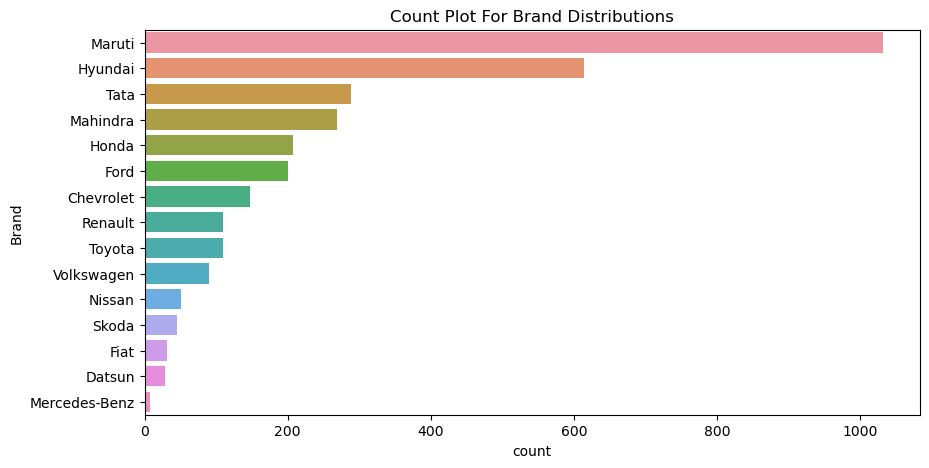

In [33]:
# Countplot for checking the brand distribution (Considering Top 15)
plt.figure(figsize=(10, 5))
sns.countplot(
    y=df_changed["Brand"],
    order=df_changed["Brand"].value_counts().sort_values(ascending=False)[
        :15].index,
)
plt.title("Count Plot For Brand Distributions")
plt.show()

Plotting a Count Plot for categorical values.

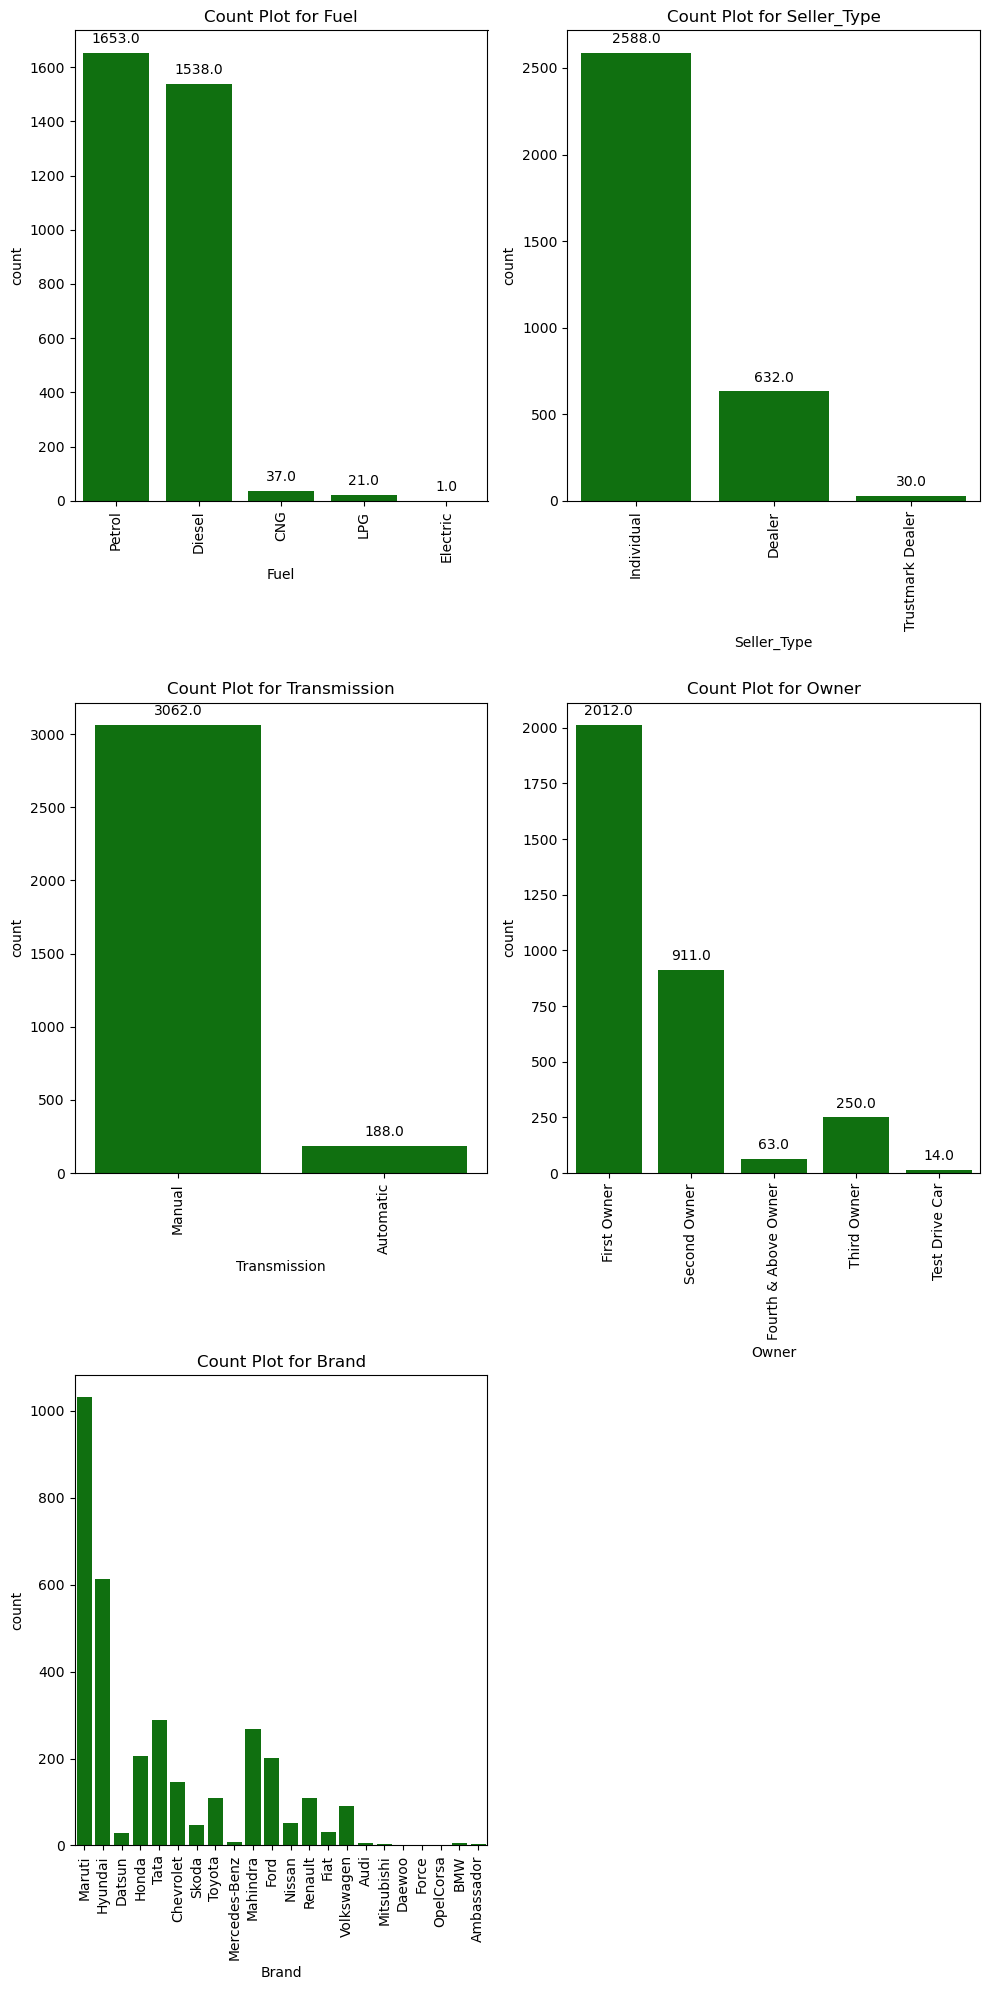

In [34]:
import os
# Define the directory and file path
dir_path = '../src/visualization'
file_path = os.path.join(dir_path, 'Count_Plot(Categorical Data).png')

# Create the directory if it does not exist
os.makedirs(dir_path, exist_ok=True)

# Plotting
plt.figure(figsize=(10, 20))
cat_col = ["Fuel", "Seller_Type", "Transmission", "Owner", "Brand"]
num_cols = len(cat_col)
num_rows = (num_cols + 1) // 2

for i, feature in enumerate(cat_col):
    plt.subplot(num_rows, 2, i + 1)
    ax = sns.countplot(data=df_changed, x=feature, color="green")
    plt.xticks(rotation=90)
    plt.title(f"Count Plot for {feature}")

    if feature != "Brand":
        for p in ax.patches:
            ax.annotate(
                f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 10),
                textcoords="offset points",
            )

plt.tight_layout()
plt.savefig(file_path)
plt.show()


Pairplot for Numerical Values on basis of Brand

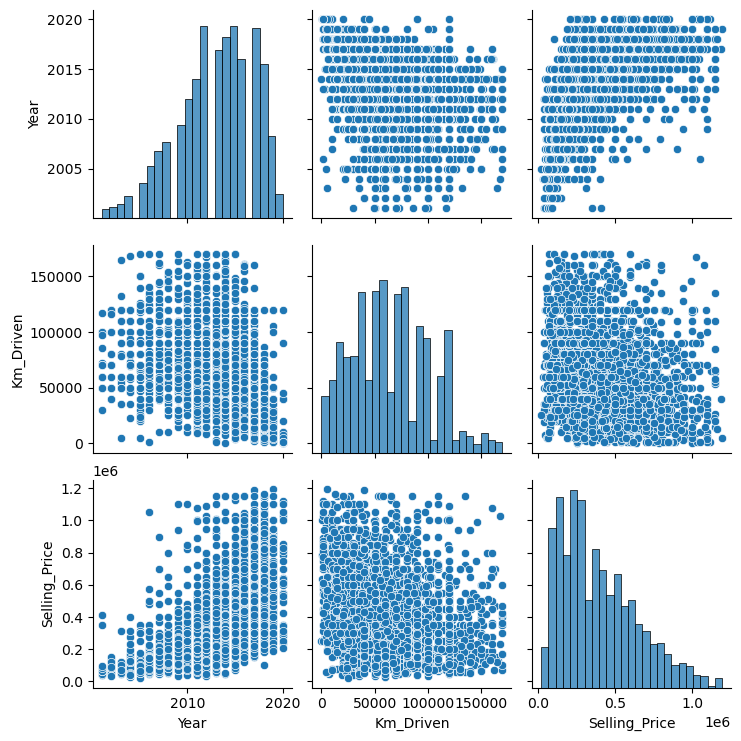

In [35]:
# Simple Pair-Plot
sns.pairplot(df_changed)
plt.savefig("../src/visualization/Pair Plot(Numerical Data).png")
plt.show()

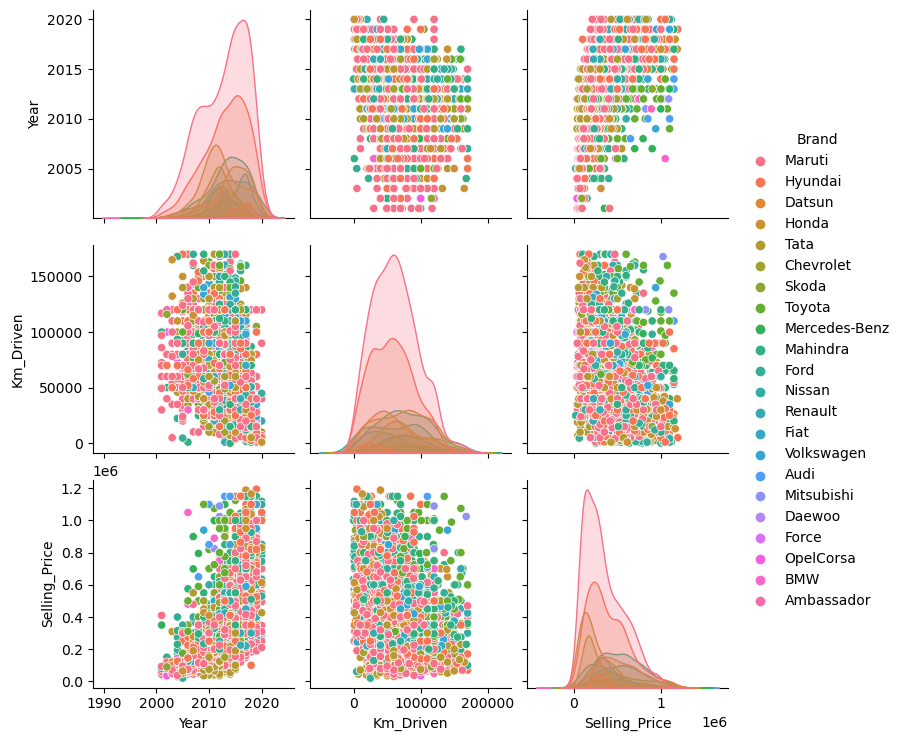

In [36]:
sns.pairplot(df_changed, hue="Brand")
plt.savefig(
    "../src/visualization/PairPlot over Selling Price(Numerical Data).png")
plt.show()

Histogram to check the Distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


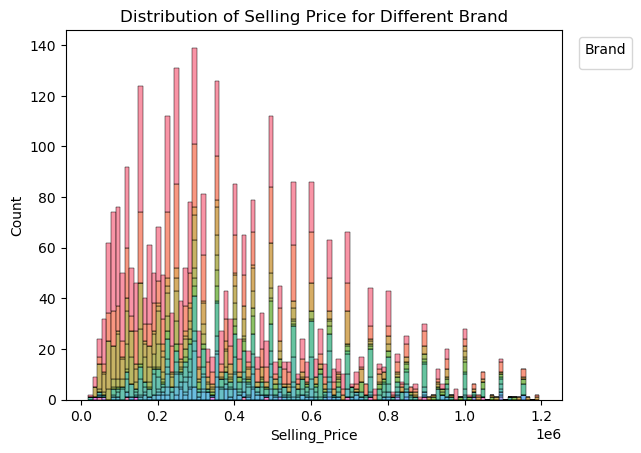

In [37]:
sns.histplot(
    data=df_changed, x="Selling_Price", hue="Brand", multiple="stack", bins=100
)
plt.title("Distribution of Selling Price for Different Brand")
plt.savefig("../src/visualization/HistPlot(Selling Price Over Brands).png")
plt.legend(title="Brand", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

Boxplot to detect Outliers

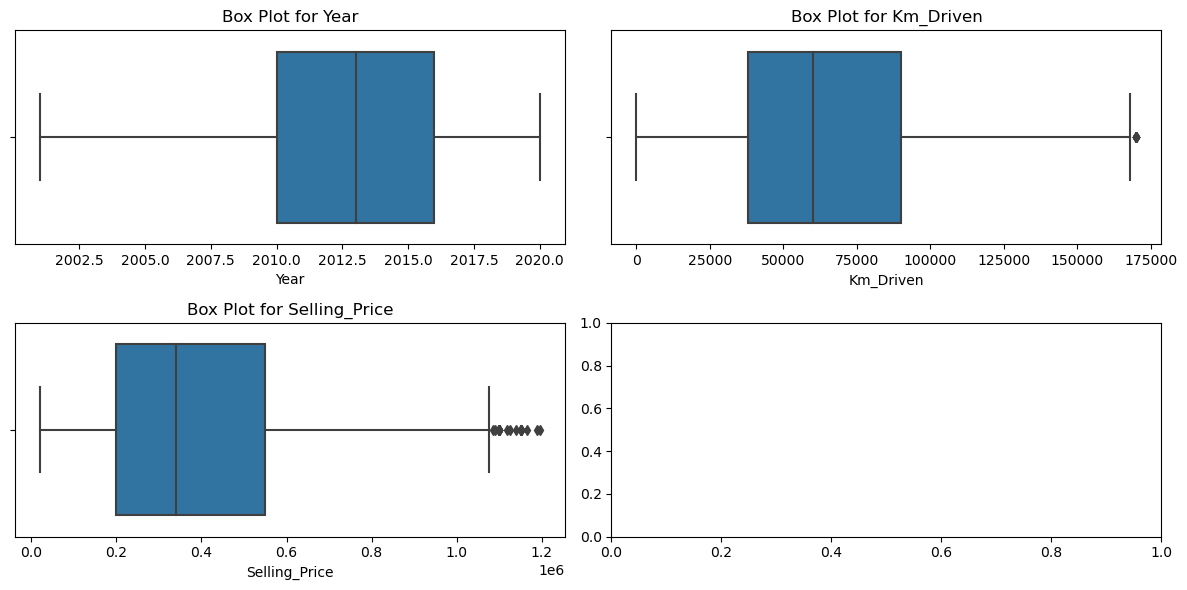

In [38]:
def subplot_boxplots(df, numerical_cols):
    num_cols = len(numerical_cols)
    num_rows = (num_cols + 1) // 2

    # Creating subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=2,
                             figsize=(12, 3 * num_rows))

    # Flatten the axes array to handle variable number of subplots
    axes = axes.flatten()

    # Plot boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sns.boxplot(ax=axes[i], data=df, x=col)
        axes[i].set_title(f"Box Plot for {col}")

    # Adjust layout
    plt.tight_layout()
    plt.savefig("../src/visualization/Boc Plot(Numerical Data).png")
    plt.show()


subplot_boxplots(df_changed, numerical_col)


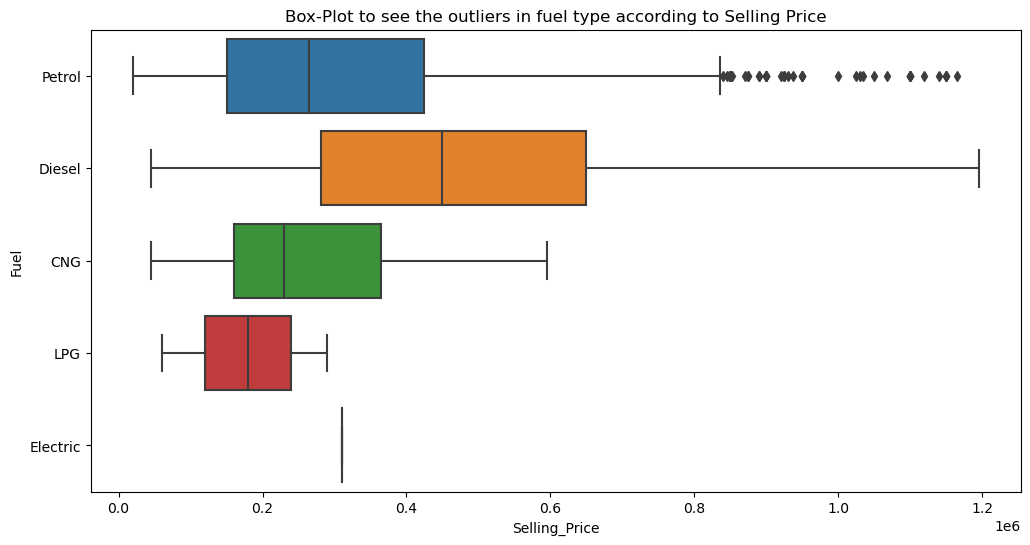

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Selling_Price", y="Fuel", data=df_changed)
plt.title("Box-Plot to see the outliers in fuel type according to Selling Price")
plt.savefig("../src/visualization/Box Plot (Fuel Type).png")
plt.show()


Heatmap to check the correlation of data (Numerical Columns)

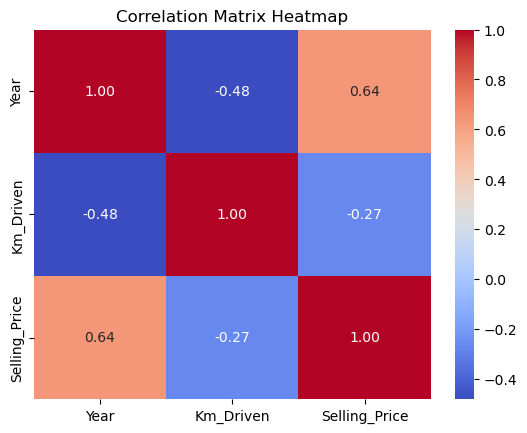

In [40]:
# Extract numeric columns
numeric_columns = df_changed.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.savefig("../src/visualization/Heat Map(Numerical Data).png")
plt.show()

Histplot for continous data

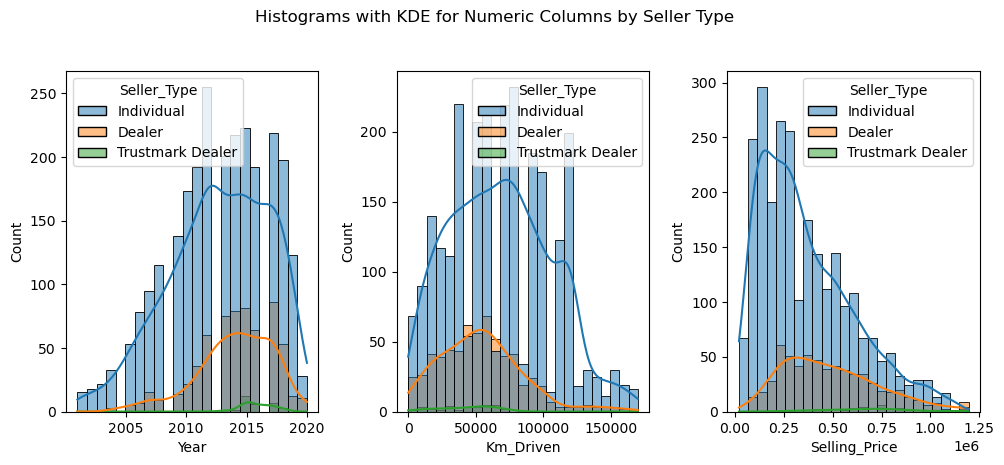

In [41]:
plt.figure(figsize=(10, 8))
for i in range(len(numeric_columns.columns)):
    plt.subplot(2, 3, i + 1)
    sns.histplot(
        data=df_changed, x=numeric_columns.columns[i], kde=True, hue="Seller_Type"
    )
    plt.xticks(rotation=0)

# Add title and adjust layout
plt.suptitle("Histograms with KDE for Numeric Columns by Seller Type", y=1.02)
plt.tight_layout()
plt.show()

Scatter Plot for checking the varitaion in Selling price.

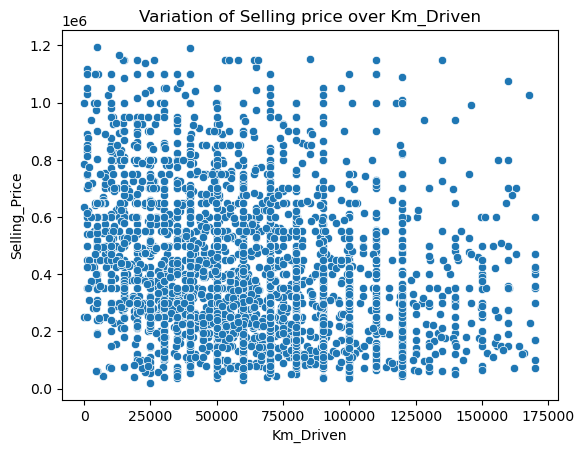

In [42]:
sns.scatterplot(x=df_changed["Km_Driven"], y=df_changed["Selling_Price"])
plt.title("Variation of Selling price over Km_Driven")
plt.savefig("../src/visualization/Scatter Plot(SP Vs KMs).png")
plt.show()

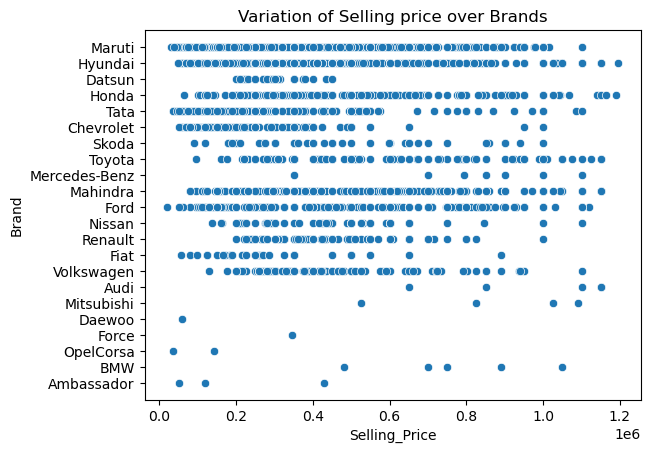

In [43]:
sns.scatterplot(x=df_changed["Selling_Price"], y=df_changed["Brand"])
plt.title("Variation of Selling price over Brands")
plt.savefig("../src/visualization/Scatter Plot(Brands Vs SP).png")
plt.show()

In [44]:
# sns.scatterplot(x=df_changed["Car_Age"], y=df_changed["Selling_Price"])
# plt.title("Variation of Selling price over year(Age of car)")
# plt.savefig("../src/visualization/Scatter Plot(SP Vs Age of Car).png")
# plt.show()

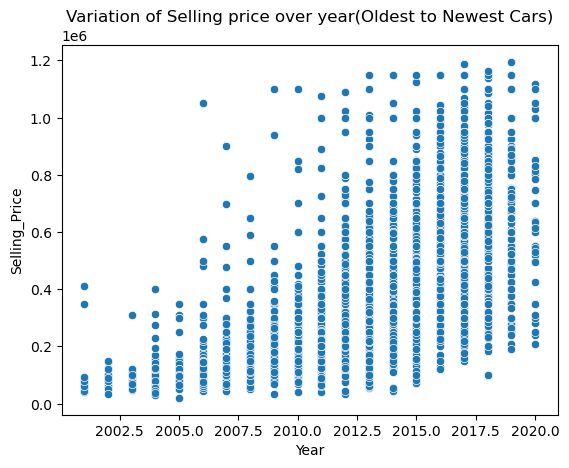

In [45]:
sns.scatterplot(x=df_changed["Year"], y=df_changed["Selling_Price"])
plt.title("Variation of Selling price over year(Oldest to Newest Cars)")
plt.savefig("../src/visualization/Scatter Plot(SP Vs Years).png")
plt.show()

Treating Outliers

In [46]:
outliers_check = df_changed.describe(
    percentiles=(0.01, 0.02, 0.03, 0.05, 0.95, 0.97, 0.98, 0.99)
).T
outliers_check = outliers_check.iloc[:, 4:]
outliers_check

,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
Year,2002.49,2004.0,2005.00,2006.0,2013.0,2019.0,2019.0,2019.0,2020.0,2020.0
Km_Driven,1974.50,5000.0,7196.12,10000.0,60000.0,125000.0,140000.0,150000.0,160000.0,170000.0
Selling_Price,55000.00,65000.0,72000.00,80000.0,340000.0,890000.0,950000.0,1000000.0,1095100.0,1195000.0


Capping the data

In [47]:
df_cap = df_changed


def capping_data(df_cap):
    for i in df_cap.columns:
        print("Check : Capped the", i, "Column")
        if df_cap[i].dtype in ["float64", "int64"]:
            Q1 = df_cap[i].quantile(0.25)
            Q3 = df_cap[i].quantile(0.75)
            IQR = Q3 - Q1
            df_cap = df_cap[
                ~((df_cap[i] < (Q1 - 1.5 * IQR)) |
                  (df_cap[i] > (Q3 + 1.5 * IQR)))
            ]
        else:
            df_cap[i] = df_cap[i]
    return df_cap


data = capping_data(df_cap)

Check : Capped the Brand Column
Check : Capped the Model Column
Check : Capped the Variant Column
Check : Capped the Name Column
Check : Capped the Year Column
Check : Capped the Km_Driven Column
Check : Capped the Fuel Column
Check : Capped the Seller_Type Column
Check : Capped the Transmission Column
Check : Capped the Owner Column
Check : Capped the Selling_Price Column


<Axes: xlabel='Km_Driven'>

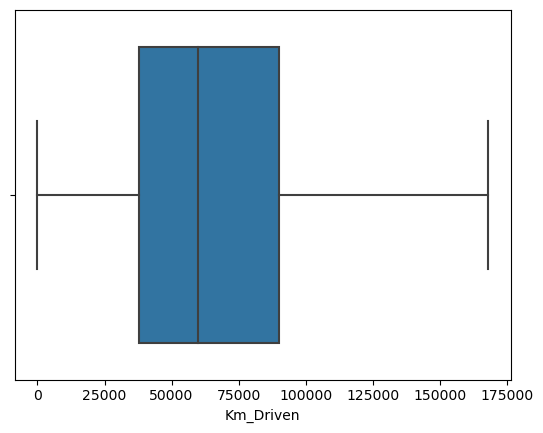

In [48]:
sns.boxplot(x=data["Km_Driven"])

<Axes: xlabel='Year'>

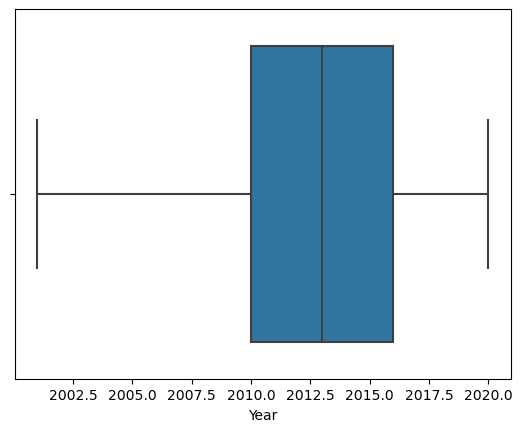

In [49]:
sns.boxplot(x=data["Year"])

<Axes: xlabel='Selling_Price'>

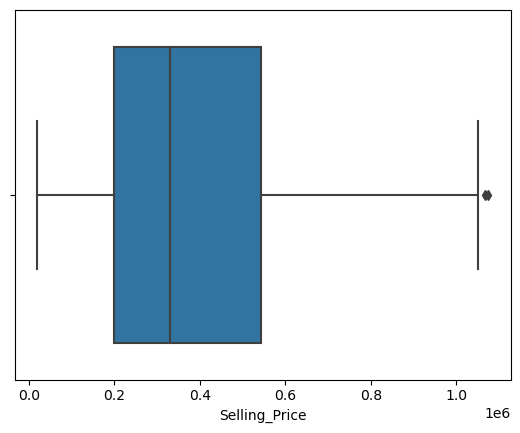

In [50]:
sns.boxplot(x=data["Selling_Price"])

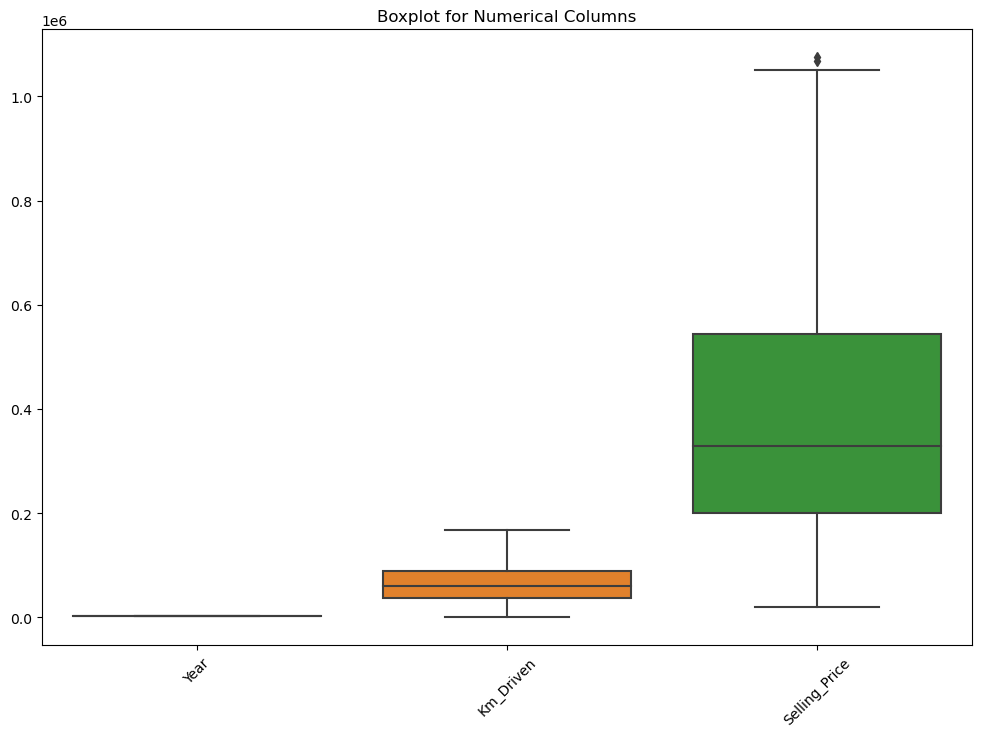

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=["number"]))
plt.title("Boxplot for Numerical Columns")
plt.xticks(rotation=45)
plt.savefig("../src/visualization/Box Plpt(AfterCapping).png")
plt.show()

Save the dataset for model

In [53]:
data.to_csv("CAR DETAILS.csv", index=False)